# String Art

Notebook to explore string art through programming.

Reference: Curve Stitching: Art of Sewing Beautiful Mathematical Patterns -- Jon Millington

## The Library

In [1]:
import numpy as np
from joy import *

In [2]:
N = 1
POINTS = []
LINES = []

START_OFFSETS = {
    "right": 0,
    "left": -np.pi,
    "bottom": -np.pi/2,
    "top": np.pi/2
}


def reset():
    global LINES, POINTS, N
    N = 1
    POINTS = []
    LINES = []

def _add_points(points):
    global POINTS, N
    POINTS += points
    N = len(POINTS)

def make_circle(x=0, y=0, r=140, num_points=36, clockwise=True, start="bottom"):
    t = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    if clockwise:
        t = -t
    t = t + START_OFFSETS[start] 
    points = list(zip(x+r*np.cos(t), y+r*np.sin(t)))
    _add_points(points)
    return points

def make_line(p1, p2, num_points, endpoint=True):
    x1, y1 = p1
    x2, y2 = p2

    xs = np.linspace(x1, x2, num_points, endpoint=endpoint)
    ys = np.linspace(y1, y2, num_points, endpoint=endpoint)

    points = list(zip(xs, ys))
    _add_points(points)
    return points

def make_polygon(x=0, y=0, r=140, n=3, num_points_per_side=10, start="top"):
    """Makes a regular polygon that fits in a circle of radius r.
    """

    t = np.linspace(0, 2*np.pi, n, endpoint=False)

    t = t + START_OFFSETS[start] 

    vertices = list(zip(x+r*np.cos(t), y+r*np.sin(t)))
    vertices2 = vertices + [vertices[0]]

    points = []
    for p1, p2 in zip(vertices2, vertices2[1:]):
        points += make_line(p1, p2, num_points_per_side, endpoint=False)
    return points

def make_star(x=0, y=0, r=140, n=3, num_points_per_side=10, start="top", endpoint=False):
    t = np.linspace(0, 2*np.pi, n, endpoint=False)

    t = t + START_OFFSETS[start] 

    vertices = list(zip(x+r*np.cos(t), y+r*np.sin(t)))

    origin = (0, 0)
    points = []
    for p in vertices:
        points += make_line(p, origin, num_points_per_side, endpoint=endpoint)
    return points
    
def make_square(x=0, y=0, size=280, num_points=40):
    d = size//2
    p1 =  d, d
    p2 =  d, -d
    p3 = -d, -d
    p4 = -d, d

    n = num_points//4

    points = []
    points += make_line(p1, p2, n, endpoint=False)
    points += make_line(p2, p3, n, endpoint=False)
    points += make_line(p3, p4, n, endpoint=False)
    points += make_line(p4, p1, n, endpoint=False)

    return points

def connect(a, b):
    a = a % N
    b = b % N
    connect_points(POINTS[a], POINTS[b])

def connect_points(p1, p2):
    LINES.append((p1, p2))
    
def connect_all(delta):
    """Connect every point to delta points forward.
    """
    for i in range(N):
        connect(i, i+delta)
        
def cross_connect(start=None, end=None):
    """Connect every point to every other point.
    
    If start is given as a list of indices, only those indices are used for starting points.
    If end is given as a list of indices only those indices are used for ending points.
    """
    start = start or range(N)
    end = end or range(N)
    for i in start:
        for j in end:
            if i != j:
                connect(i, j)
    
def draw():
    def draw_line(p1, p2):
        x1, y1 = p1
        x2, y2 = p2
        return line(x1=x1, y1=y1, x2=x2, y2=y2, stroke_width=0.5)
    
    points = [circle(x=x, y=y, r=1, fill="black") for x, y in POINTS]
    lines = [draw_line(p1, p2) for p1, p2 in LINES]
    return Group(points+lines)
        

## Examples

Make a circle.

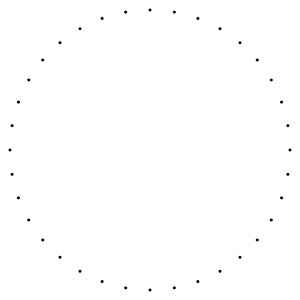

In [3]:
reset()
make_circle()
draw()

Make a circle and connect point 0 with all other points.

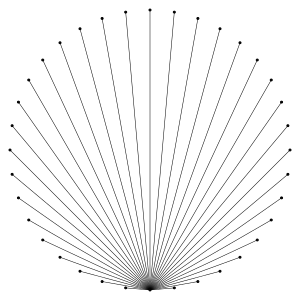

In [4]:
reset()
make_circle()

for i in range(N):
    connect(0, i)
    
draw()

## Chapter 2: Designs made from parabolas

### 1. A pair of opposite parabolas

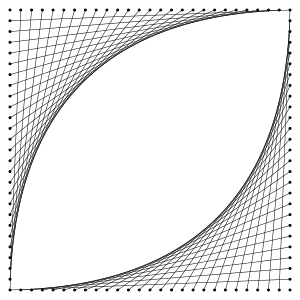

In [5]:
reset()
n = 26

points = make_square(num_points=n*4)

for i in range(n):
    j = i + n + 1
    connect(i, j)
    connect(-i, -j)

draw()

### 2. Zig-zag parabolas

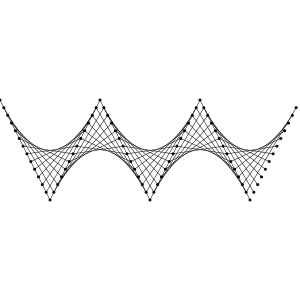

In [6]:
x, y = -150, 50

dx = 50
dy = 100
n = 13

def down():
    global x, y
    x += dx
    y -= dy

def up():
    global x, y
    x += dx
    y += dy

reset()

for i in range(3):
    p1 = (x, y)
    down()
    p2 = (x, y)
    up()
    p3 = (x, y)
    make_line(p1, p2, num_points=13, endpoint=False)
    make_line(p2, p3, num_points=13, endpoint=False)

for i in range(n * 5):
    connect(i, i+n)

draw()

### 3. Three parabolas in a triangle

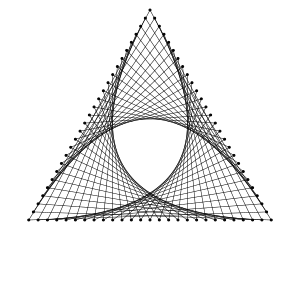

In [7]:
reset()
n = 26
points = make_polygon(n=3, num_points_per_side=n)

connect_all(n+1)

draw()

### 4. Four parabolas in a square

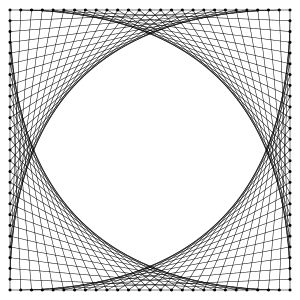

In [8]:
reset()
n = 26

points = make_square(num_points=n*4)

# for i in range(4*n):
#     j = i + n
#     connect(i, j)
connect_all(n)

draw()

### 5. Six parabolas in a hexagon

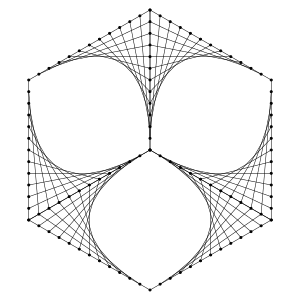

In [9]:
reset()

# XXX: Had to use one more point for the star to compensate for exta point at the origin

n1 = 12
n2 = n1+1
points1 = make_polygon(n=6, num_points_per_side=n1)
points2 = make_star(n=3, num_points_per_side=n2, endpoint=True)

def pairs(i1, i2):
    def _point(i1, i2):
        i1 = i1 % len(points1)
        i2 = i2 % len(points2)
        return points1[i1], points2[i2]

    for i in range(3):
        yield _point(2*i*n1+i1, i*n2+i2)
        yield _point(2*i*n1-i1, i*n2+i2)

def connect_pairs(i1, i2):
    for p1, p2 in pairs(i1, i2):
        connect_points(p1, p2)

for i in range(n2):
    i1 = i
    i2 = n1-i
    connect_pairs(i1, i2)

draw()

### 6. Eight parabolas in an octagon

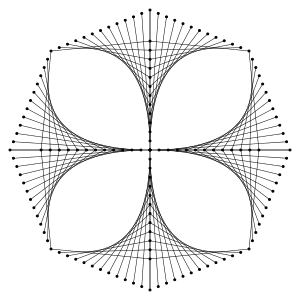

In [10]:
reset()

# XXX: Had to use one more point for the star to compensate for exta point at the origin

r = 140
n1 = 12
n2 = n1+1
points1 = make_polygon(n=8, r=r, num_points_per_side=n1)
points2 = make_star(n=4, r=1.1*r/SQRT2, num_points_per_side=n2, endpoint=True)

def pairs(i1, i2):
    def _point(i1, i2):
        i1 = i1 % len(points1)
        i2 = i2 % len(points2)
        return points1[i1], points2[i2]

    for i in range(4):
        yield _point(2*i*n1+i1, i*n2+i2)
        yield _point(2*i*n1-i1, i*n2+i2)

def connect_pairs(i1, i2):
    for p1, p2 in pairs(i1, i2):
        connect_points(p1, p2)

for i in range(n2):
    i1 = i
    i2 = n2-i-1
    connect_pairs(i1, i2)

draw()

### 7. Four pairs of parabolas

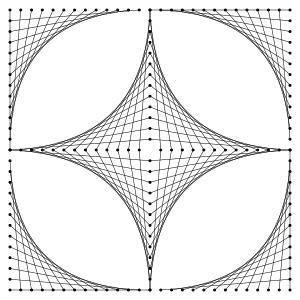

In [11]:
reset()
n = 26
n2 = n//2

points1 = make_square(num_points=n*4)
points2 = make_star(n=4, num_points_per_side=n2)

def pairs(points, i, j):
    n = len(points)//4
    for k in range(4):
        d = n * k
        i1 = (d+i)%len(points)
        i2 = (d+j)%len(points)
        p1 = points[i1]
        p2 = points[i2]
        yield (p1, p2)


def _connect(points, i, j):
    for p1, p2 in pairs(points, i, j):
        connect_points(p1, p2)

for i in range(n2):
    _connect(points1, i, i-n2)
    _connect(points2, i, n-i-1)

draw()

### 8. Eight pointed star

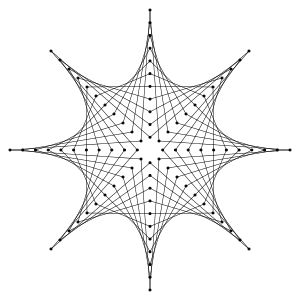

In [12]:
reset()
n = 11
make_star(n=8, num_points_per_side=n)

def _connect(start=0):
    for i in range(n):
        j = n-i-1
        connect(start+i, start+n+j)

for i in range(8):
    _connect(i*n)

draw()

## Chapter 3: Designs made from circles

### 1. Equal Chords

In [13]:
reset()
make_circle()

connect_all(15)

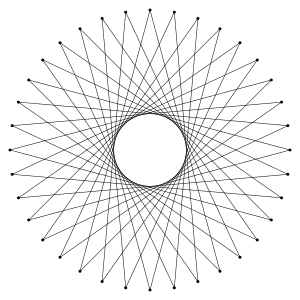

In [14]:
draw()

### 2. Two sets of equal chords

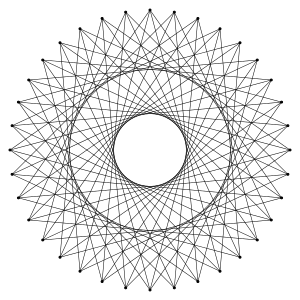

In [15]:
reset()
make_circle()

connect_all(11)
connect_all(15)
draw()

### 3. Nine point mystic rose

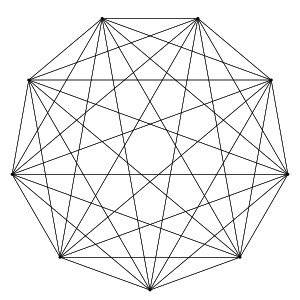

In [16]:
reset()
make_circle(num_points=9)
cross_connect()
draw()

### 4. Twelve point mystic rose

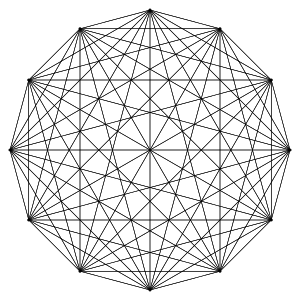

In [17]:
reset()
make_circle(num_points=12)
cross_connect()
draw()

### 5. An incomplete mystic rose

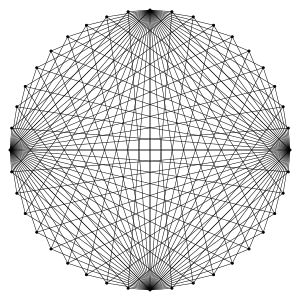

In [18]:
reset()
make_circle(num_points=40)
cross_connect(start=[0, 10, 20, 30])

draw()



### 6. Sunrise

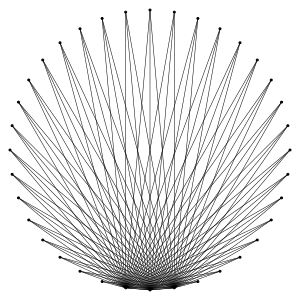

In [19]:
reset()
make_circle(num_points=36)
cross_connect(start=[-1,0, 1])
draw()

### 7. Sunflower

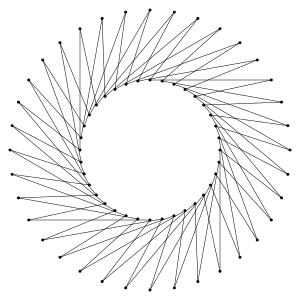

In [20]:
reset()

n = 36

c1 = make_circle(r=70, num_points=36)
c2 = make_circle(r=140, num_points=36)

def connect_circles(delta):
    for i in range(n):
        j = (i+delta) % n
        connect_points(c1[i], c2[j])

connect_circles(2)
connect_circles(6)

draw()

### 8. Two linked circles

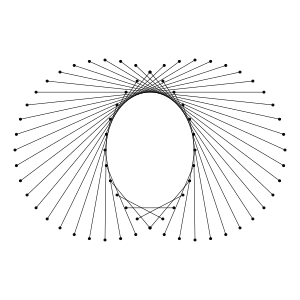

In [21]:
reset()

r = 90
n = 36
c1 = make_circle(x=-r/2, r=r, num_points=n)
c2 = make_circle(x=r/2, r=r, num_points=n)

def connect_circles(delta):
    for i in range(n):
        j = (i+delta) % n
        connect_points(c1[i], c2[j])

connect_circles(10)

draw()

### 9. Concentric circles 1

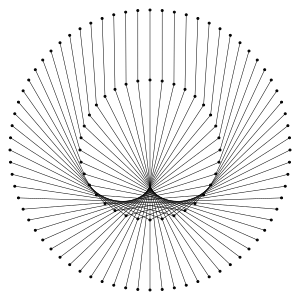

In [22]:
reset()

r = 70
n = 36
c1 = make_circle(r=r, num_points=n, start="top")
c2 = make_circle(r=2*r, num_points=2*n, start="top")

def connect_lines(delta):
    for i in range(n):
        j = i + delta
        connect_points(c1[i], c2[j])

connect_lines(0)
connect_lines(36)


draw()

### 10. Concentric circles 2

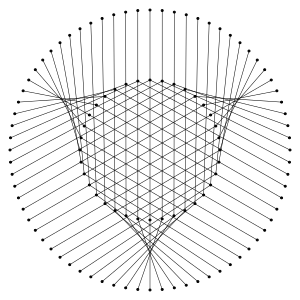

In [23]:
reset()

r = 70
n = 36
c1 = make_circle(r=r, num_points=n, clockwise=False)
c2 = make_circle(r=2*r, num_points=2*n)


def connect_lines(offset):
    for i in range(n):
        j = i + offset
        connect_points(c1[i], c2[j])

connect_lines(0)
connect_lines(36)

draw()

## Chapter 4: Further Developments

### 8. Cardioid

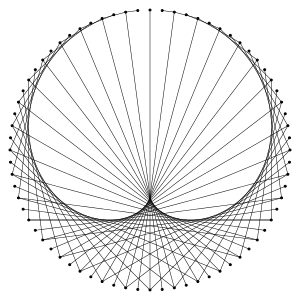

In [24]:
reset()

make_circle(num_points=72, start="top")

for i in range(1, 72+1):
    connect(i, 2*i)

draw()

### 9. Nephroid

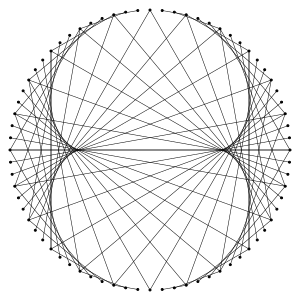

In [25]:
reset()

make_circle(num_points=72, start="top")

for i in range(1, 72+1):
    connect(i, 3*i)

draw()

### 10. Epicycloid of Cremona

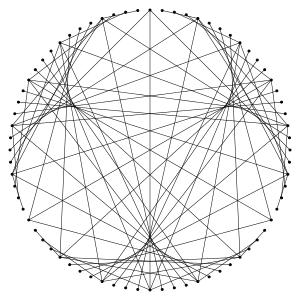

In [26]:
reset()

make_circle(num_points=72, start="top")

for i in range(1, 72+1):
    connect(i, 4*i)

draw()